PREPROCESSING

Dataset Shape: (10459, 9055)
Missing Values:
 0


C:\Users\daksh\AppData\Local\Temp\ipykernel_19460\3272694354.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='binary_label', data=df, palette='coolwarm')


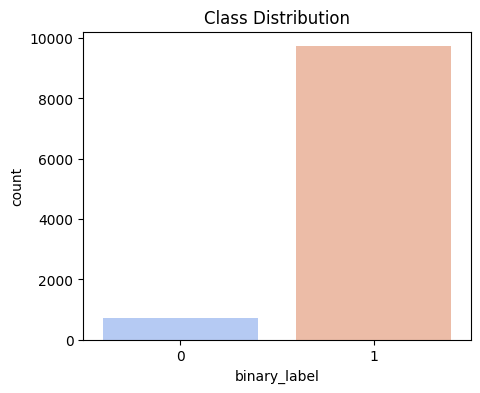

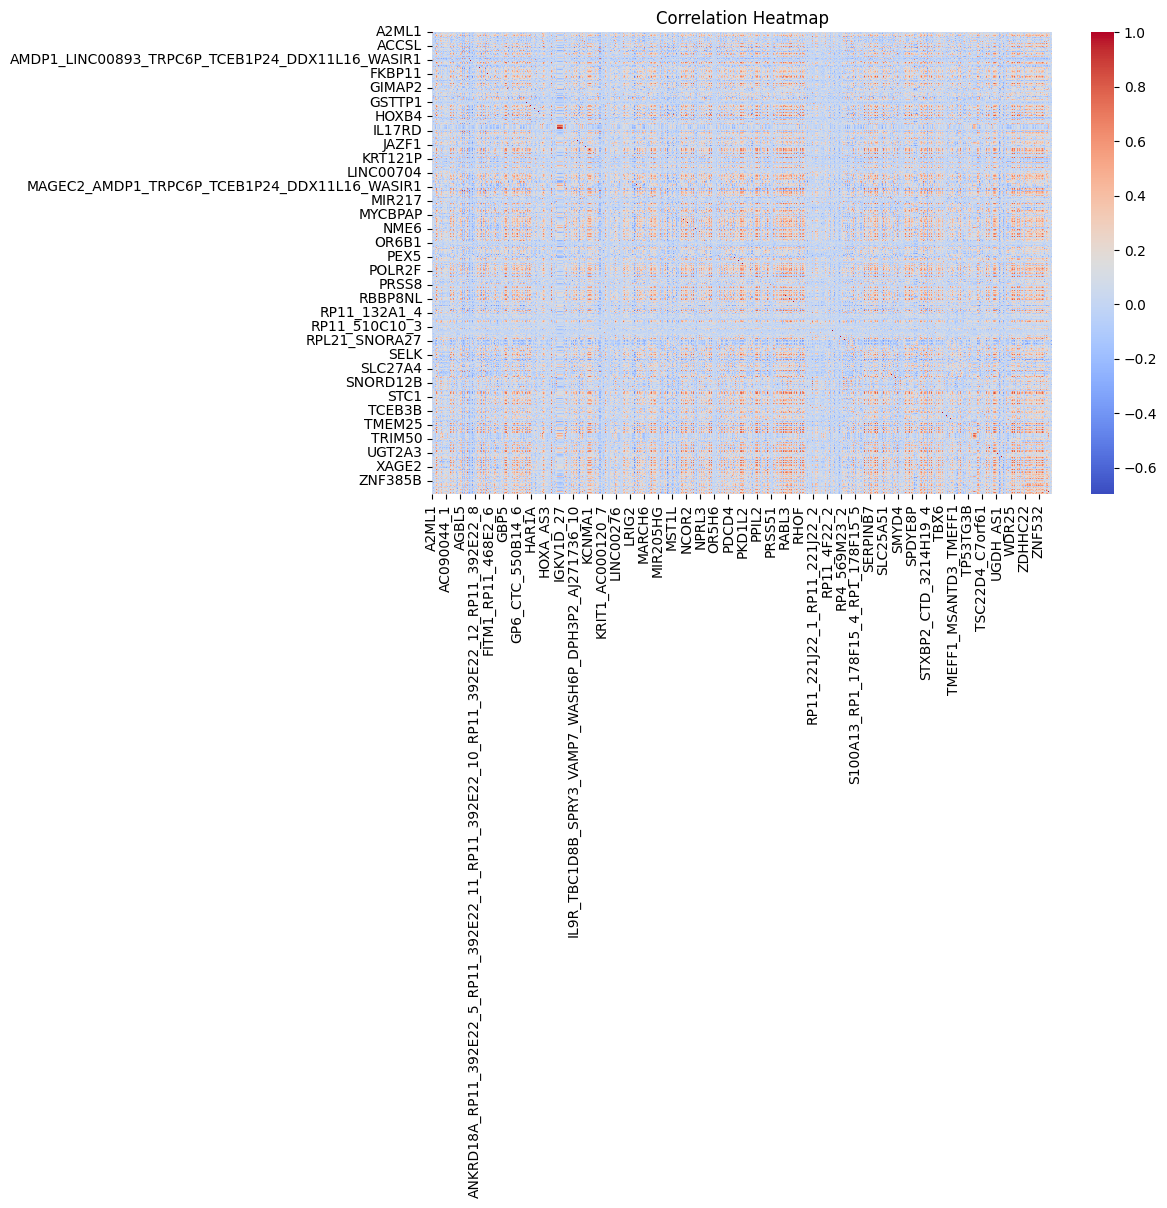

In [2]:
# ======================================================
# üì¶ IMPORTS
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import time

# ======================================================
# üìÇ LOAD DATA
# ======================================================
df = pd.read_csv("binary.csv")

print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum().sum())

# ======================================================
# üîç BASIC VISUALIZATIONS
# ======================================================
# 1Ô∏è‚É£ Target distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='binary_label', data=df, palette='coolwarm')
plt.title("Class Distribution")
plt.show()

# 2Ô∏è‚É£ Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ======================================================
# üßπ PREPROCESSING
# ======================================================
target_col = 'binary_label'
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)



Dataset Shape: (10459, 9055)
Missing Values:
 0


C:\Users\daksh\AppData\Local\Temp\ipykernel_19460\1281014049.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='binary_label', data=df, palette='coolwarm')


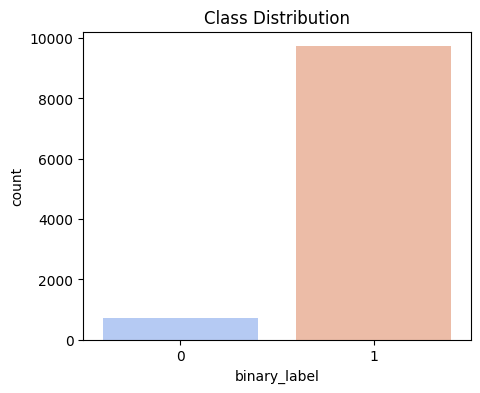

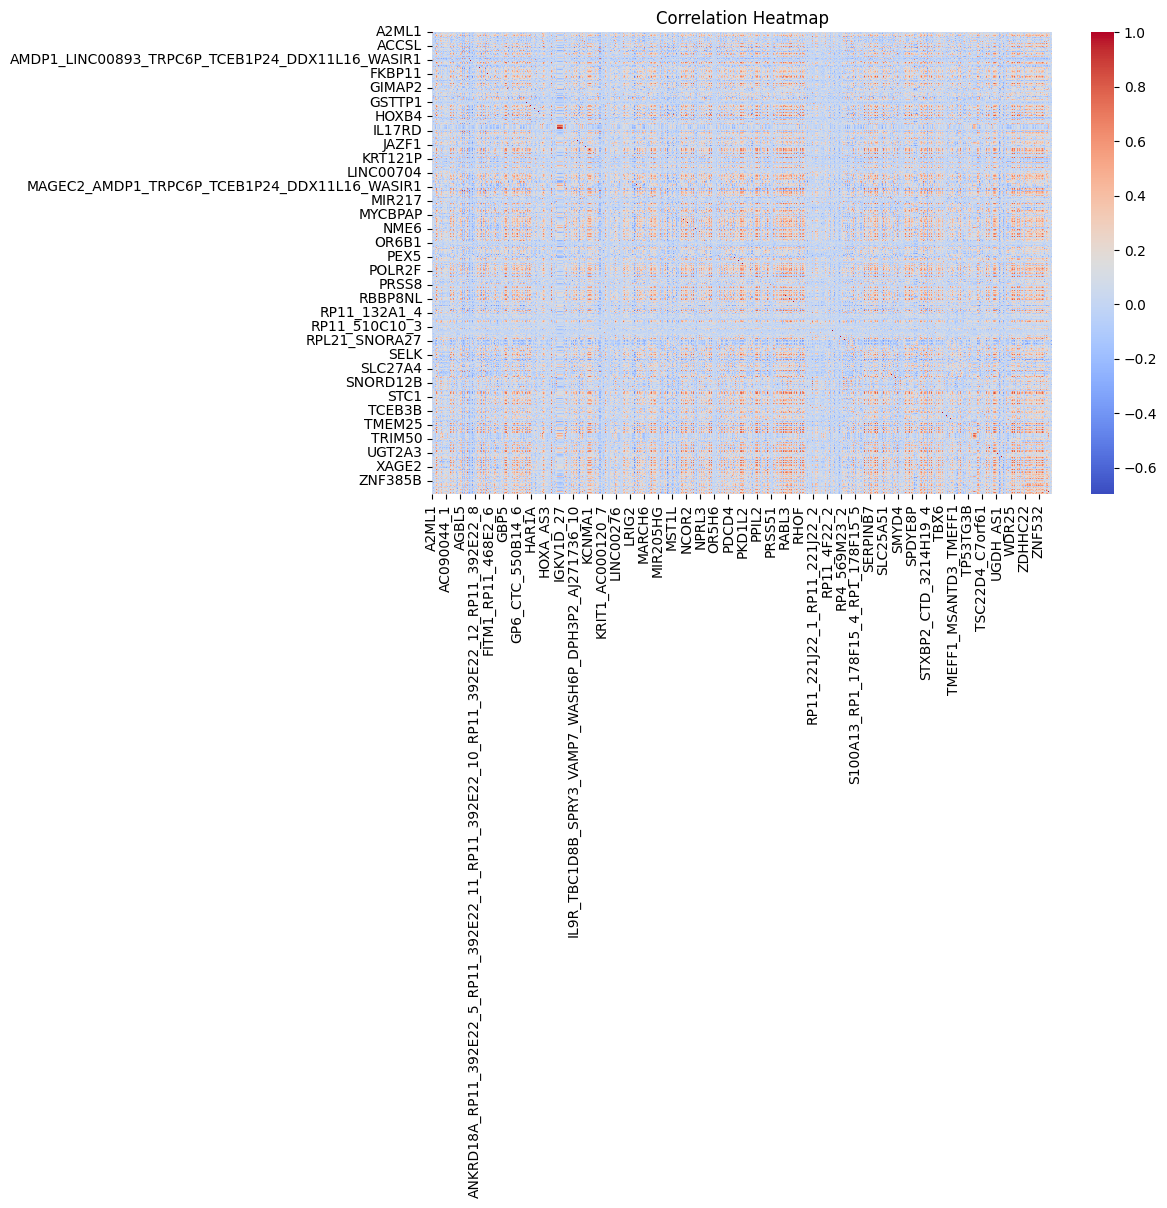

Epoch 1/20 | Train Loss: 0.0915 | Val Loss: 0.0494 | Time: 4.07s
Epoch 2/20 | Train Loss: 0.0519 | Val Loss: 0.0618 | Time: 4.23s
Epoch 3/20 | Train Loss: 0.0442 | Val Loss: 0.0531 | Time: 4.06s
Epoch 4/20 | Train Loss: 0.0426 | Val Loss: 0.0544 | Time: 4.06s
Epoch 5/20 | Train Loss: 0.0357 | Val Loss: 0.0624 | Time: 3.95s
Epoch 6/20 | Train Loss: 0.0344 | Val Loss: 0.0453 | Time: 4.17s
Epoch 7/20 | Train Loss: 0.0312 | Val Loss: 0.0541 | Time: 4.52s
Epoch 8/20 | Train Loss: 0.0361 | Val Loss: 0.0525 | Time: 4.48s
Epoch 9/20 | Train Loss: 0.0307 | Val Loss: 0.0711 | Time: 4.34s
Epoch 10/20 | Train Loss: 0.0300 | Val Loss: 0.0490 | Time: 4.33s
Epoch 11/20 | Train Loss: 0.0314 | Val Loss: 0.0463 | Time: 4.33s
‚è∏Ô∏è Early stopping triggered!


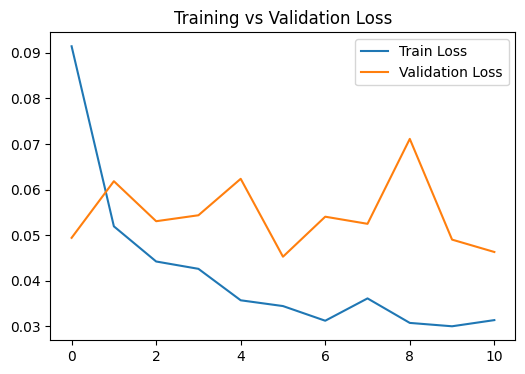


‚úÖ Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       145
         1.0       0.99      0.99      0.99      1947

    accuracy                           0.99      2092
   macro avg       0.96      0.95      0.95      2092
weighted avg       0.99      0.99      0.99      2092

Accuracy: 0.9876, F1 Score: 0.9933


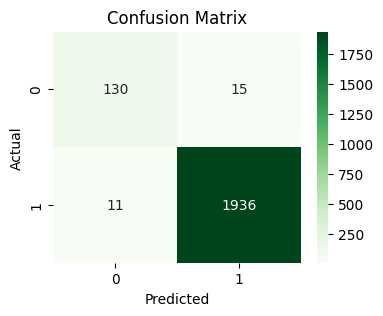

In [ ]:
# ======================================================
# üì¶ IMPORTS
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import time

# ======================================================
# üìÇ LOAD DATA
# ======================================================
df = pd.read_csv("binary.csv")

print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum().sum())

# ======================================================
# üîç BASIC VISUALIZATIONS
# ======================================================
# 1Ô∏è‚É£ Target distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='binary_label', data=df, palette='coolwarm')
plt.title("Class Distribution")
plt.show()

# 2Ô∏è‚É£ Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ======================================================
# üßπ PREPROCESSING
# ======================================================
target_col = 'binary_label'
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

# ======================================================
# ‚öôÔ∏è DATASET + DATALOADER
# ======================================================
class BinaryDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(BinaryDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(BinaryDataset(X_test, y_test), batch_size=32)

# ======================================================
# üß† LIGHT SAINT MODEL (FAST VERSION)
# ======================================================
class SAINTBinary(nn.Module):
    def __init__(self, num_features, dropout=0.2):
        super(SAINTBinary, self).__init__()
        self.embedding = nn.Linear(num_features, 128)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=128, nhead=4, dim_feedforward=256, dropout=dropout, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=2)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(128, 1)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)
        x = self.transformer(x)
        x = x.mean(dim=1)
        x = self.dropout(x)
        return torch.sigmoid(self.fc(x))

# ======================================================
# ‚öôÔ∏è TRAINING
# ======================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SAINTBinary(num_features=X_train.shape[1]).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

best_val_loss = np.inf
patience = 5
wait = 0

EPOCHS = 20
train_losses, val_losses = [], []

for epoch in range(EPOCHS):
    start_time = time.time()
    model.train()
    train_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb).squeeze()
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for Xb, yb in test_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb).squeeze()
            loss = criterion(preds, yb)
            val_loss += loss.item()
    val_loss /= len(test_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Time: {(time.time()-start_time):.2f}s")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0
        torch.save(model.state_dict(), "best_binary_saint.pt")
    else:
        wait += 1
        if wait >= patience:
            print("‚è∏Ô∏è Early stopping triggered!")
            break

# ======================================================
# üìâ LOSS CURVE
# ======================================================
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# ======================================================
# üßæ EVALUATION
# ======================================================
model.load_state_dict(torch.load("best_binary_saint.pt"))
model.eval()

y_pred = []
with torch.no_grad():
    for Xb, _ in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb).squeeze()
        y_pred.extend(preds.cpu().numpy())

y_pred = np.array(y_pred)
y_pred_label = (y_pred >= 0.5).astype(int)

print("\n‚úÖ Classification Report:")
print(classification_report(y_test, y_pred_label))

acc = accuracy_score(y_test, y_pred_label)
f1 = f1_score(y_test, y_pred_label)
print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_label), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
